Construir um código que faça um backtesting dos últimos 6 anos, escolhendo as 8 melhores ações do índice ibovespa e utilizado como critério o fator momento 7 meses.

Passo a Passo da estratégia:
- Definir um universo investível
- Escolher o fator que servirá como critério para criação dos rankings
- Escolher o período de teste
- Escolher o número de ações na carteira 
- Definir o período de balanceamento. De quanto em quanto tempo a carteira muda?

In [1]:
!pip install quantstats

In [1]:
import yfinance as yf
import pandas as pd
import quantstats as qs

Ler composição histórica do ibovespa e os tickers que já passaram pelo índice:

In [2]:
comp_historica = pd.read_excel("composicao_ibov (4).xlsx")
tickers = pd.read_excel('composicao_ibov (4).xlsx', sheet_name = 'lista_acoes')

tickers

,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


In [3]:
comp_historica

,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,...,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30
0,ABEV3,ABEV3,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,...,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3,VALE3
1,AMER3,BBAS3,ABEV3,BBDC4,BBDC4,ABEV3,ABEV3,ABEV3,BBDC4,ABEV3,...,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,PETR4,ITUB4,PETR4,ITUB4
2,AURE3,BBDC3,BBDC4,ABEV3,ABEV3,BBDC4,BBDC4,BBDC4,ABEV3,BBDC4,...,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,ITUB4,PETR4,ITUB4,PETR4
3,B3SA3,BBDC4,BRFS3,PETR4,PETR4,BRFS3,PETR4,PETR4,PETR4,PETR4,...,PETR3,BBDC4,BBDC4,BBDC4,BBDC4,PETR3,PETR3,BBDC4,BBDC4,BBDC4
4,B3SA3,BBSE3,CIEL3,BRFS3,PETR3,PETR4,BRFS3,BRFS3,BRFS3,BRFS3,...,BBDC4,B3SA3,PETR3,PETR3,PETR3,BBDC4,BBDC4,PETR3,PETR3,PETR3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,EZTC3,JHSF3,JHSF3,GOLL4,GOLL4,GOLL4,GOLL4,CVCB3,CVCB3,EZTC3
88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,JHSF3,EZTC3,EZTC3,JHSF3,EZTC3,CASH3,CASH3,GOLL4,ECOR3,ECOR3
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CASH3,CASH3,CASH3,EZTC3,CASH3,POSI3,POSI3,ECOR3,GOLL4,CVCB3
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,POSI3,POSI3,POSI3,CASH3,POSI3,NaN,NaN,POSI3,POSI3,CASH3


Puxar cotações de todas as empresas que farão parte do backtest:

In [4]:
tickers['tickers'].to_list()

['ENEV3.SA',
 'SOMA3.SA',
 'ELET6.SA',
 'BIDI4.SA',
 'RAIZ4.SA',
 'QUAL3.SA',
 'USIM5.SA',
 'PETR3.SA',
 'MRVE3.SA',
 'CRFB3.SA',
 'NTCO3.SA',
 'CIEL3.SA',
 'AZUL4.SA',
 'IGTI11.SA',
 'CMIN3.SA',
 'FIBR3.SA',
 'SLCE3.SA',
 'POSI3.SA',
 'EZTC3.SA',
 'ENBR3.SA',
 'BBDC4.SA',
 'BBAS3.SA',
 'EMBR3.SA',
 'BPAC11.SA',
 'TIMS3.SA',
 'ELET3.SA',
 'VIIA3.SA',
 'COGN3.SA',
 'B3SA3.SA',
 'CSAN3.SA',
 'GOAU4.SA',
 'ITUB4.SA',
 'CMIG4.SA',
 'RRRP3.SA',
 'BRAP4.SA',
 'MULT3.SA',
 'AURE3.SA',
 'TOTS3.SA',
 'PRIO3.SA',
 'RDOR3.SA',
 'CCRO3.SA',
 'ITSA4.SA',
 'PCAR3.SA',
 'CPLE6.SA',
 'IRBR3.SA',
 'SAPR11.SA',
 'GETT11.SA',
 'EQTL3.SA',
 'VBBR3.SA',
 'JBSS3.SA',
 'MRFG3.SA',
 'JHSF3.SA',
 'BRML3.SA',
 'CSNA3.SA',
 'TAEE11.SA',
 'WEGE3.SA',
 'VALE5.SA',
 'FLRY3.SA',
 'UGPA3.SA',
 'DXCO3.SA',
 'BBSE3.SA',
 'GOLL4.SA',
 'BPAN4.SA',
 'GGBR4.SA',
 'BRFS3.SA',
 'SMTO3.SA',
 'BBDC3.SA',
 'OIBR3.SA',
 'AMER3.SA',
 'MGLU3.SA',
 'SUZB3.SA',
 'CVCB3.SA',
 'BIDI11.SA',
 'BRKM5.SA',
 'PETZ3.SA',
 'JPSA3.SA',
 'EGIE

In [5]:
dados_cot = yf.download(tickers = tickers['tickers'].to_list(),
                       start = '2015-05-29', end = '2022-12-31')['Adj Close']

dados_cot

[*********************100%***********************]  107 of 107 completed

7 Failed downloads:
- LCAM3.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted
- BIDI4.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted
- BRML3.SA: No data found, symbol may be delisted
- JPSA3.SA: No data found, symbol may be delisted
- SULA11.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236554,6.685467,23.799561,20.257244,NaN,NaN,NaN,2.771958,14.430489,8.534480,...,30.210817,4.333781,12.760989,16.042191,NaN,6.362684,22.250927,15.229004,5.741956,14.081800
2015-06-01,14.290334,6.698973,23.468353,20.240713,NaN,NaN,NaN,2.866007,14.519325,8.664779,...,30.509329,4.291294,12.754621,16.042191,NaN,6.362684,22.111130,15.308527,5.782250,13.637919
2015-06-02,14.328955,6.617936,23.657616,20.876854,NaN,NaN,NaN,2.925406,14.881050,8.833380,...,30.851736,4.384767,13.588385,17.238655,NaN,6.362684,21.784935,16.401997,5.926640,13.867514
2015-06-03,14.228539,6.658455,22.616678,20.653791,NaN,NaN,NaN,2.913031,14.341648,8.556315,...,30.553225,4.282795,13.295612,16.903645,NaN,6.362684,21.901430,16.451698,5.926640,13.523121
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN


Transformar índice em data e ordenar a série de tempo:

In [6]:
dados_cot.index = pd.to_datetime(dados_cot.index)
dados_cot = dados_cot.sort_index()

dados_cot

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-05-29,14.236554,6.685467,23.799561,20.257244,NaN,NaN,NaN,2.771958,14.430489,8.534480,...,30.210817,4.333781,12.760989,16.042191,NaN,6.362684,22.250927,15.229004,5.741956,14.081800
2015-06-01,14.290334,6.698973,23.468353,20.240713,NaN,NaN,NaN,2.866007,14.519325,8.664779,...,30.509329,4.291294,12.754621,16.042191,NaN,6.362684,22.111130,15.308527,5.782250,13.637919
2015-06-02,14.328955,6.617936,23.657616,20.876854,NaN,NaN,NaN,2.925406,14.881050,8.833380,...,30.851736,4.384767,13.588385,17.238655,NaN,6.362684,21.784935,16.401997,5.926640,13.867514
2015-06-03,14.228539,6.658455,22.616678,20.653791,NaN,NaN,NaN,2.913031,14.341648,8.556315,...,30.553225,4.282795,13.295612,16.903645,NaN,6.362684,21.901430,16.451698,5.926640,13.523121
2015-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.451698,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.165410,34.267910,12.759445,...,12.746346,6.920000,84.465065,NaN,15.75,2.560000,37.196148,NaN,38.228981,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.234442,34.219345,12.463381,...,12.259920,6.960000,85.238083,NaN,15.24,2.550000,36.325722,NaN,37.921162,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.770941,33.082912,12.539784,...,12.190430,7.020000,87.273392,NaN,15.05,2.370000,36.180649,NaN,37.742432,9.900000


Calcular média de retorno nos últimos 7 meses e ajustar a tabela com o fator:

In [15]:
r7 = (dados_cot.resample('M').last().pct_change().rolling(7).mean().
         dropna(axis=0, how='all').drop('2022-12-31'))
r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,-0.029248,-0.065977,-0.017682,NaN,NaN,NaN,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,NaN,-0.124164,-0.011703,-0.185254,-0.014471,-0.031506
2016-01-31,0.000195,-0.002171,-0.057474,-0.028699,NaN,NaN,NaN,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,NaN,-0.159640,-0.019134,-0.162126,-0.025967,-0.050952
2016-02-29,-0.010277,0.037138,-0.059721,-0.022236,NaN,NaN,NaN,0.023766,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,NaN,-0.060308,-0.011987,-0.060618,-0.044619,-0.008536
2016-03-31,0.001905,0.023046,-0.007280,0.018368,NaN,NaN,NaN,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.005600,NaN,-0.049514,0.021719,0.010680,-0.019768,-0.001055
2016-04-30,0.002799,0.066272,-0.005534,0.036802,NaN,NaN,NaN,0.076269,0.072911,0.053328,...,0.014022,0.046471,0.050635,0.057512,NaN,0.075383,0.034796,0.084867,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,0.011073,0.035023,NaN,-0.084621,0.013326,0.040819,0.006532,...,-0.009828,-0.066972,-0.005767,0.000000,-0.032003,-0.080970,-0.004796,0.000000,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,0.025646,0.062656,NaN,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,0.000000,-0.027345,-0.017738,-0.020296,0.000000,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,NaN,-0.051255,-0.006519,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,0.000000,-0.037782,0.009078,-0.023345,0.000000,0.021418,-0.044394


Classificar e retirar empresas que não participaram do ibovespa no período de tempo selecionado:

In [16]:
for data in r7.index:
    for empresa in r7.columns:
        
        if empresa.replace('.SA', '') not in comp_historica.loc[:, data].to_list():
            r7.loc[data, empresa] = pd.NA

r7

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.001950,<NA>,-0.065977,<NA>,<NA>,NaN,<NA>,0.004278,-0.047123,-0.025609,...,-0.016049,-0.147154,-0.053107,-0.060219,<NA>,<NA>,-0.011703,<NA>,<NA>,-0.031506
2016-01-31,0.000195,<NA>,-0.057474,<NA>,<NA>,NaN,<NA>,-0.009982,-0.067365,-0.042596,...,-0.012267,-0.184219,-0.076857,-0.092112,<NA>,<NA>,-0.019134,<NA>,-0.025967,-0.050952
2016-02-29,-0.010277,<NA>,-0.059721,<NA>,<NA>,NaN,<NA>,0.023766,-0.057441,-0.014066,...,-0.012792,-0.169228,-0.042859,-0.057539,<NA>,<NA>,-0.011987,<NA>,-0.044619,-0.008536
2016-03-31,0.001905,<NA>,-0.007280,<NA>,<NA>,NaN,<NA>,0.063214,0.036939,0.040653,...,0.016324,0.009749,-0.002857,-0.0056,<NA>,<NA>,0.021719,<NA>,-0.019768,-0.001055
2016-04-30,0.002799,<NA>,-0.005534,<NA>,<NA>,NaN,<NA>,0.076269,0.072911,0.053328,...,0.014022,0.046471,0.050635,0.057512,<NA>,<NA>,0.034796,<NA>,0.002375,-0.014793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.003146,-0.060367,-0.094451,<NA>,0.035023,<NA>,-0.084621,0.013326,0.040819,0.006532,...,-0.009828,-0.066972,-0.005767,<NA>,-0.032003,-0.08097,-0.004796,<NA>,-0.014438,-0.053880
2022-08-31,0.004276,-0.038994,-0.070376,<NA>,0.062656,<NA>,-0.055093,-0.022352,0.045491,-0.002959,...,-0.005972,-0.084394,-0.015005,<NA>,-0.027345,-0.017738,-0.020296,<NA>,-0.009613,-0.074785
2022-09-30,0.004607,-0.018176,-0.062861,0.035933,0.045528,<NA>,-0.051255,-0.006519,0.024358,0.014543,...,-0.022141,-0.082029,-0.018461,<NA>,-0.037782,0.009078,-0.023345,<NA>,0.021418,-0.044394


Criar carteiras de investimento em uma matriz de 0 ou 1:

In [25]:
carteiras = r7.rank(axis = 1, ascending = False)

for data in carteiras.index:
    for empresa in carteiras.columns:
        
        if carteiras.loc[data, empresa] < 9:
            carteiras.loc[data, empresa] = 1
        else:
            carteiras.loc[data, empresa] = 0

carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-08-31,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-30,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calcular retorno mensal das empresas no período de backtest:

In [32]:
retorno_mensal = dados_cot.resample('M').last().pct_change()
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:8], axis = 0)
carteiras.index = retorno_mensal.index

retorno_mensal

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043573,...,-0.017701,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083431,-0.107034,0.034114,-0.160573
2016-02-29,-0.048030,0.219479,-0.128959,-0.062632,NaN,NaN,NaN,0.132554,-0.022382,0.188885,...,0.064734,0.058824,0.215021,0.182321,NaN,0.814516,0.095161,0.482877,-0.142028,0.089667
2016-03-31,0.065760,-0.123003,0.229437,0.311062,NaN,NaN,NaN,0.320998,0.475473,0.293587,...,0.111854,1.011111,0.282811,0.329439,NaN,0.075556,0.130946,0.286374,0.069195,-0.071317
2016-04-30,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119218,0.118361,0.027805,...,0.036348,0.381215,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-05-31,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067893,-0.249184,-0.126904,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164768,0.095988,...,0.066194,-0.068525,-0.027339,0.000000,0.102703,0.341667,-0.077579,0.000000,0.008916,-0.070943
2022-09-30,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137732,0.173842
2022-10-31,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


Cruzar a matriz de retorno mensal com a das carteiras para chegar na rentabilidade do modelo:

In [34]:
retorno_modelo = (carteiras * retorno_mensal).sum(axis=1) / 8

retorno_modelo

Date
2016-01-31   -0.069522
2016-02-29    0.060109
2016-03-31    0.074721
2016-04-30    0.186030
2016-05-31   -0.182579
                ...   
2022-08-31    0.097156
2022-09-30   -0.055039
2022-10-31    0.083444
2022-11-30   -0.083596
2022-12-31   -0.011460
Freq: M, Length: 84, dtype: float64

Visualizar a rentabilidade do modelo:

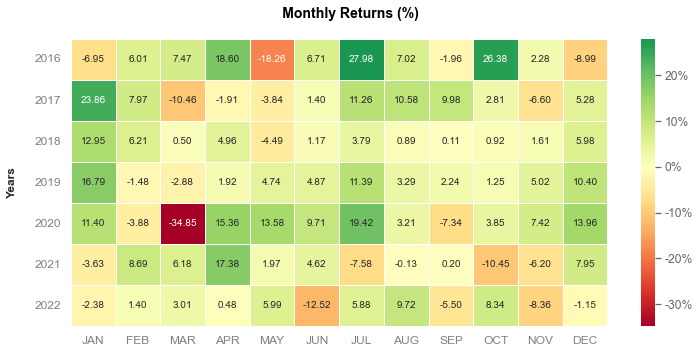

In [36]:
qs.extend_pandas()

retorno_modelo.plot_monthly_heatmap()

Puxar e rentabilizar a rentabilidade do ibovespa no período:

In [48]:
ibovespa = yf.download('^BVSP', start = '2015-12-30', end = '2022-12-31')['Adj Close']

retorno_ibovespa = ibovespa.resample('M').last().pct_change().dropna()
retorno_ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

Calcular e visualizar as rentabilidades do modelo contra o ibovespa:

retorno acumulado modelo:


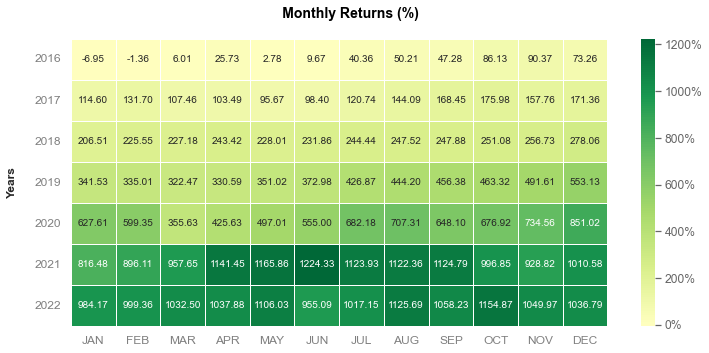

retorno acumulado ibovespa:


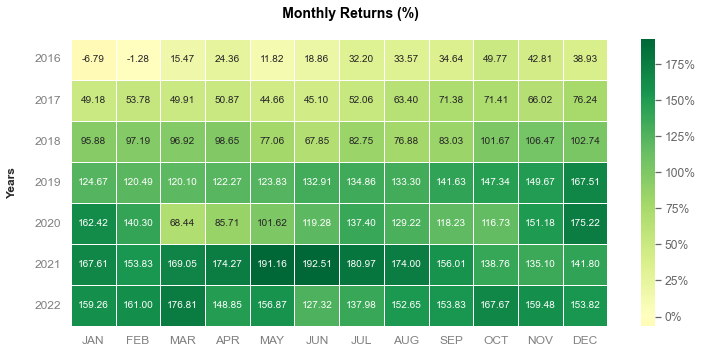

In [53]:
retorno_acum_modelo = (1 + retorno_modelo).cumprod() - 1
retorno_acum_ibov = (1 + retorno_ibovespa).cumprod() - 1

print('retorno acumulado modelo:')
retorno_acum_modelo.plot_monthly_heatmap()

print('retorno acumulado ibovespa:')
retorno_acum_ibov.plot_monthly_heatmap()

Calcular e visualizar as rentabilidades do modelo contra o ibovespa:

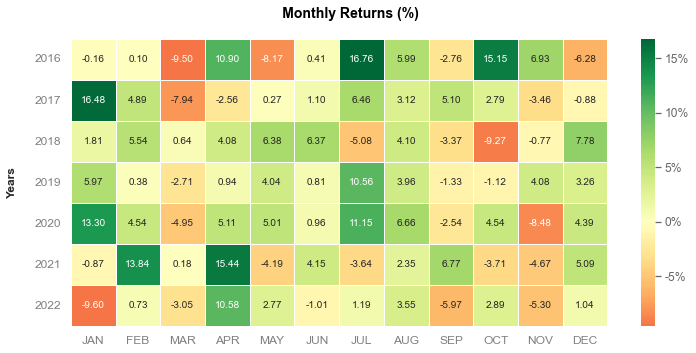

In [52]:
over_perform_modelo_menos_ibov = retorno_modelo - retorno_ibovespa

over_perform_modelo_menos_ibov.plot_monthly_heatmap()